In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [48]:
df = pd.read_csv('Kaggle Datasets/Agriculture/Crop_recommendation.csv')

In [49]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [50]:
df.shape

(2200, 8)

In [51]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [52]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

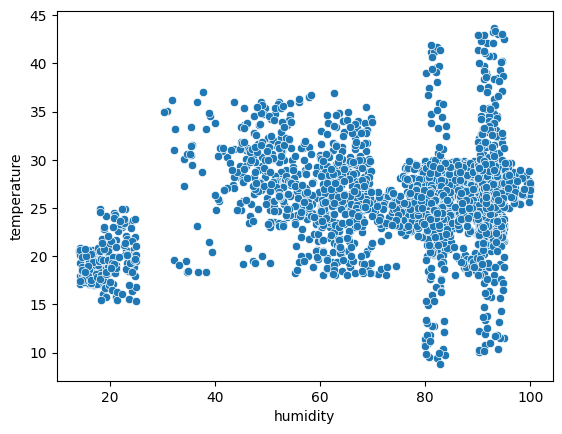

In [53]:
sns.scatterplot(x='humidity', y='temperature', data=df)
plt.show()

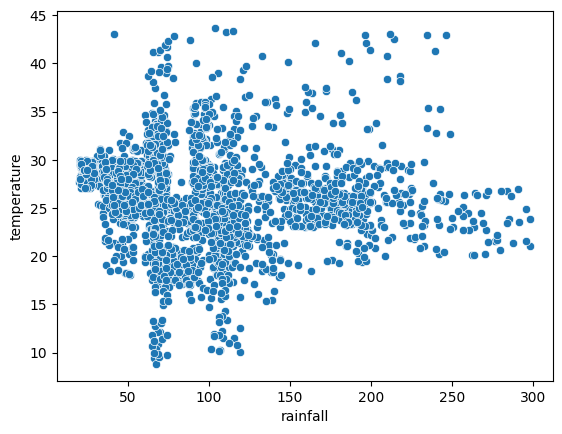

In [54]:
sns.scatterplot(x='rainfall', y='temperature', data=df)
plt.show()

<Axes: xlabel='ph', ylabel='temperature'>

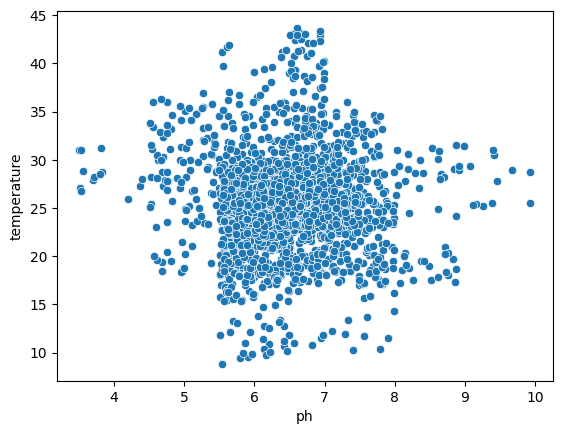

In [55]:
sns.scatterplot(x='ph', y='temperature', data=df)

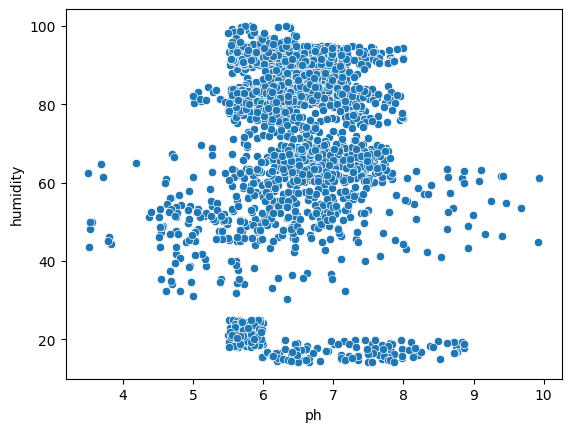

In [56]:
sns.scatterplot(x='ph', y='humidity', data=df)
plt.show()

<Axes: xlabel='ph', ylabel='rainfall'>

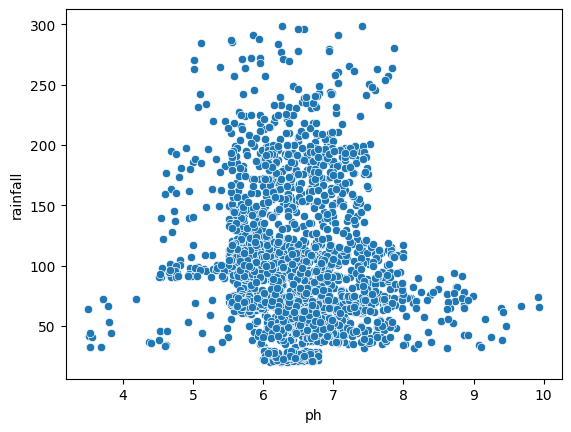

In [57]:
sns.scatterplot(x='ph', y='rainfall', data=df)

<Axes: xlabel='rainfall', ylabel='Count'>

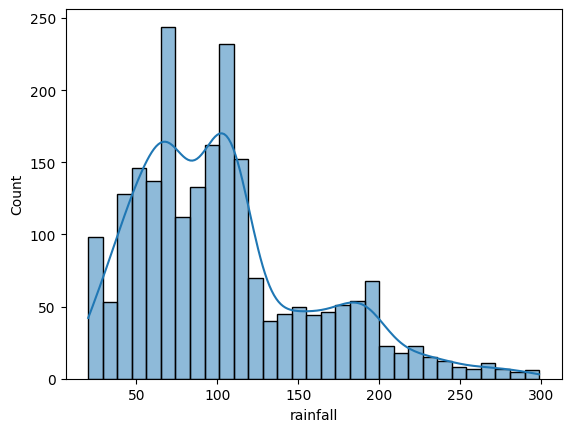

In [58]:
sns.histplot(df['rainfall'], kde=True)

<Axes: xlabel='humidity', ylabel='Count'>

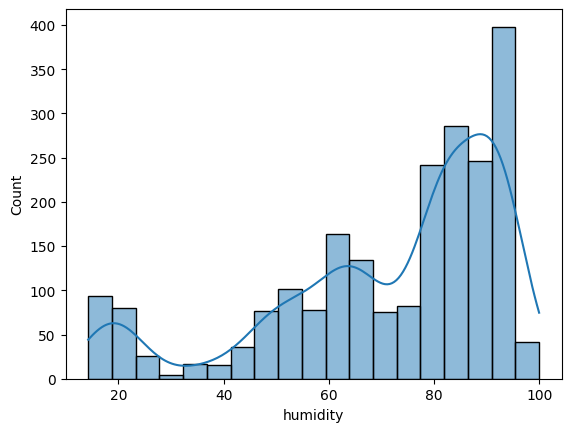

In [59]:
sns.histplot(df['humidity'], kde=True)

<Axes: xlabel='temperature', ylabel='Count'>

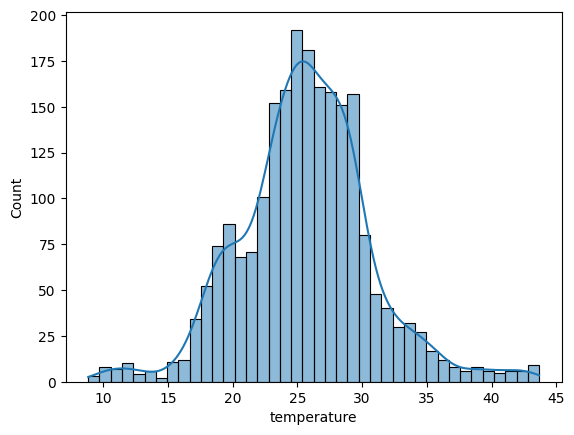

In [60]:
sns.histplot(df['temperature'], kde=True)

<Axes: xlabel='ph', ylabel='Count'>

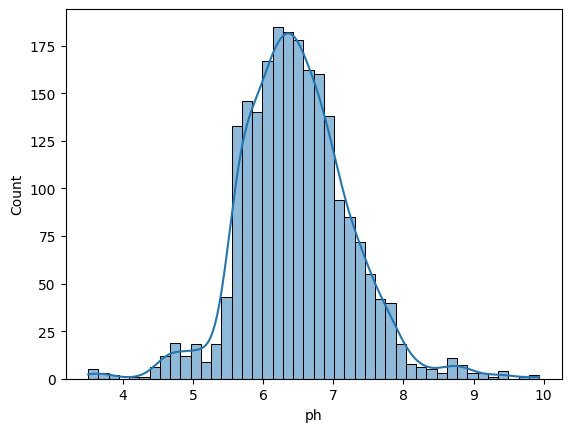

In [61]:
sns.histplot(df['ph'], kde=True)

<Axes: xlabel='N', ylabel='Count'>

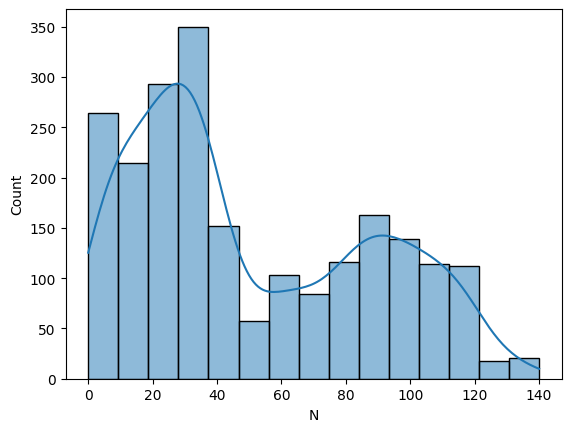

In [62]:
sns.histplot(df['N'], kde=True)

<Axes: xlabel='P', ylabel='Count'>

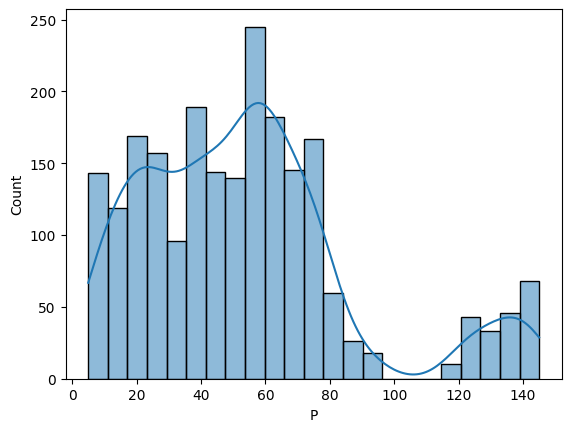

In [63]:
sns.histplot(df['P'], kde=True)

<Axes: xlabel='K', ylabel='Count'>

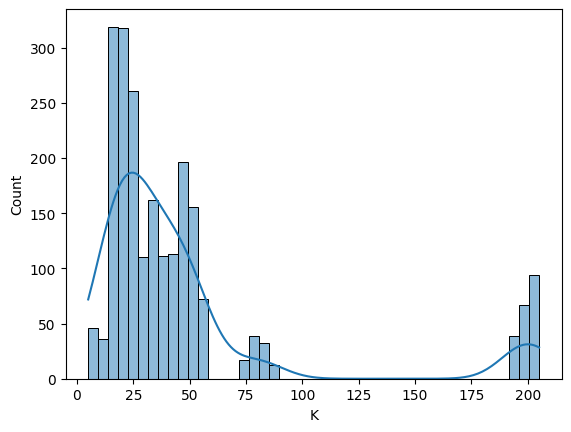

In [64]:
sns.histplot(df['K'], kde=True)

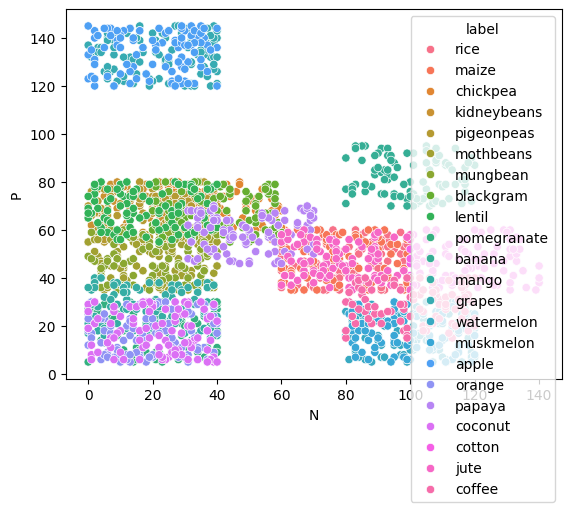

In [65]:
sns.scatterplot(x='N', y='P', data=df, hue='label')
plt.show()

In [66]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [67]:
df['label'].value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [68]:
corr = df.corr(numeric_only=True)

<Axes: >

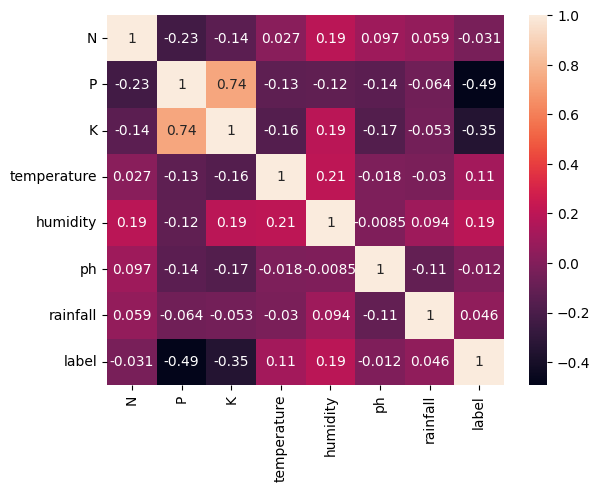

In [69]:
sns.heatmap(corr, annot=True)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [71]:
scaler = StandardScaler()

In [74]:
X = df.drop('label', axis=1)
y = df['label']

In [77]:
X = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train

array([[-0.90904306, -1.13294593, -0.67439784, ...,  0.92995964,
         0.20168816, -0.00945465],
       [-0.36716896,  0.77739624, -0.57565467, ..., -0.09586864,
         0.87166712, -0.6197892 ],
       [-1.17998011,  0.59545889, -0.45716288, ..., -0.37511658,
         1.05791806, -1.06022921],
       ...,
       [-1.07160529, -0.5264881 , -0.33867109, ..., -0.88514041,
         0.00771459, -0.05833171],
       [-1.07160529,  2.14192637,  3.07784228, ...,  0.38567125,
        -0.14001591, -0.58354176],
       [-0.50263749,  0.74707335, -0.51640878, ..., -0.4100052 ,
         0.6947325 , -0.91097967]])

In [80]:
y_train

1656    16
752      2
892     10
1041     1
1179    12
        ..
1638    16
1095     1
1130    12
1294     7
860     10
Name: label, Length: 1760, dtype: int64

In [81]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [82]:
y_pred = model.predict(X_test)

In [ ]:

accuracy_score(y_test, y_pred)

0.9636363636363636